# Comprehensive Portfolio Analysis

In [1]:
#1

import pandas_datareader.data as web
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import quandl
import scipy.optimize as sco
plt.style.use('fivethirtyeight')
np.random.seed(777)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
stocks = ['EA','AMD','SBUX','JPM']

#download daily price data for each of the stocks in the portfolio
table1 = web.DataReader(stocks,data_source='yahoo',start='01/01/2005')['Adj Close']  # 15 years
table2 = web.DataReader(stocks,data_source='yahoo',start='01/01/2010')['Adj Close']  # 10 years
table3 = web.DataReader(stocks,data_source='yahoo',start='01/01/2015')['Adj Close']  # 5 years

In [3]:
table1.head()

Symbols,AMD,EA,JPM,SBUX
Date,,,,
2005-01-03,21.410000,60.880001,26.075567,12.978539
2005-01-04,20.209999,59.139999,25.806831,12.970048
2005-01-05,19.750000,59.709999,25.860567,13.076187
2005-01-06,19.719999,58.410000,26.008398,12.681354
2005-01-07,19.920000,58.939999,25.800112,12.666492


In [4]:
table2.head()

Symbols,AMD,EA,JPM,SBUX
Date,,,,
2010-01-04,9.70,18.150000,33.283356,9.785914
2010-01-05,9.71,18.660000,33.928047,10.015170
2010-01-06,9.57,18.180000,34.114464,9.942998
2010-01-07,9.47,18.040001,34.790226,9.917527
2010-01-08,9.43,18.400000,34.704784,9.883562


In [5]:
table3.head()

Symbols,AMD,EA,JPM,SBUX
Date,,,,
2015-01-02,2.67,46.869999,54.462791,37.132599
2015-01-05,2.66,46.570000,52.771992,36.421303
2015-01-06,2.63,45.959999,51.403664,36.124943
2015-01-07,2.58,46.810001,51.482113,37.014053
2015-01-08,2.61,48.130001,52.632545,37.611340


In [6]:
#2.1

table1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3827 entries, 2005-01-03 to 2020-03-17
Data columns (total 4 columns):
AMD     3827 non-null float64
EA      3827 non-null float64
JPM     3827 non-null float64
SBUX    3827 non-null float64
dtypes: float64(4)
memory usage: 149.5 KB


In [7]:
table2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2568 entries, 2010-01-04 to 2020-03-17
Data columns (total 4 columns):
AMD     2568 non-null float64
EA      2568 non-null float64
JPM     2568 non-null float64
SBUX    2568 non-null float64
dtypes: float64(4)
memory usage: 100.3 KB


In [8]:
table3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1310 entries, 2015-01-02 to 2020-03-17
Data columns (total 4 columns):
AMD     1310 non-null float64
EA      1310 non-null float64
JPM     1310 non-null float64
SBUX    1310 non-null float64
dtypes: float64(4)
memory usage: 51.2 KB


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Stock History (Last 15 years)')

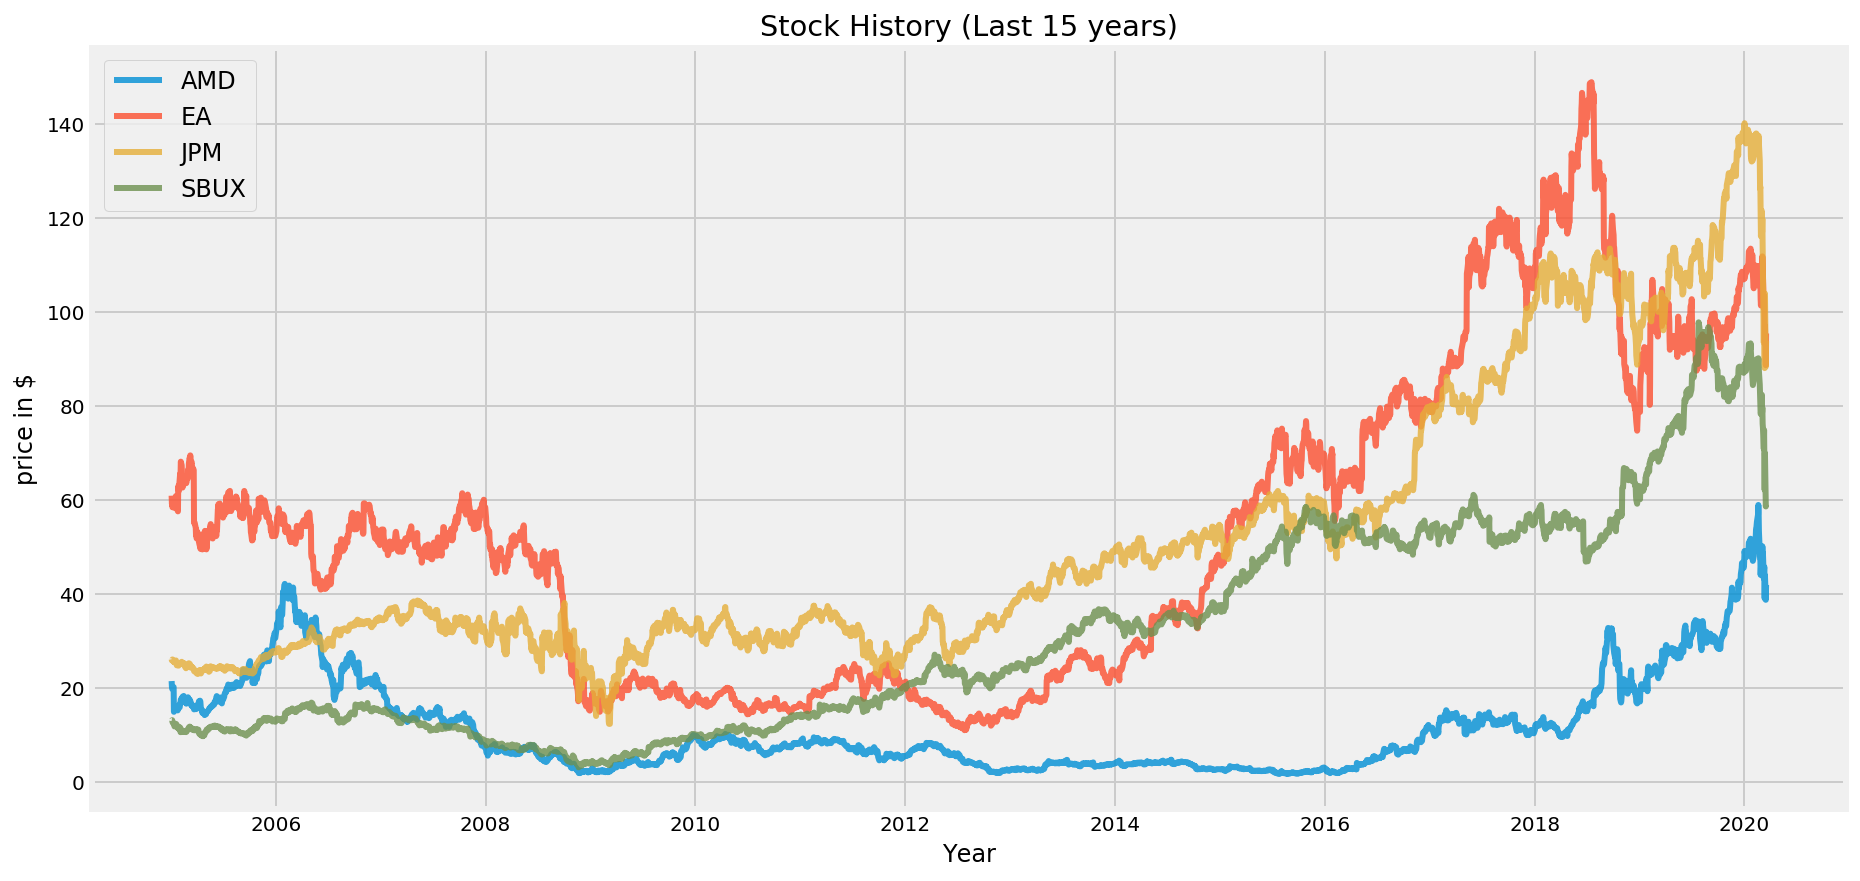

In [9]:
# 15 Years

plt.figure(figsize=(14, 7))
for c in table1.columns.values:
    plt.plot(table1.index, table1[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper left', fontsize=12)
plt.ylabel('price in $')
plt.xlabel('Year')
plt.title('Stock History (Last 15 years)')

Text(0.5, 1.0, 'Stock History (Last 10 years)')

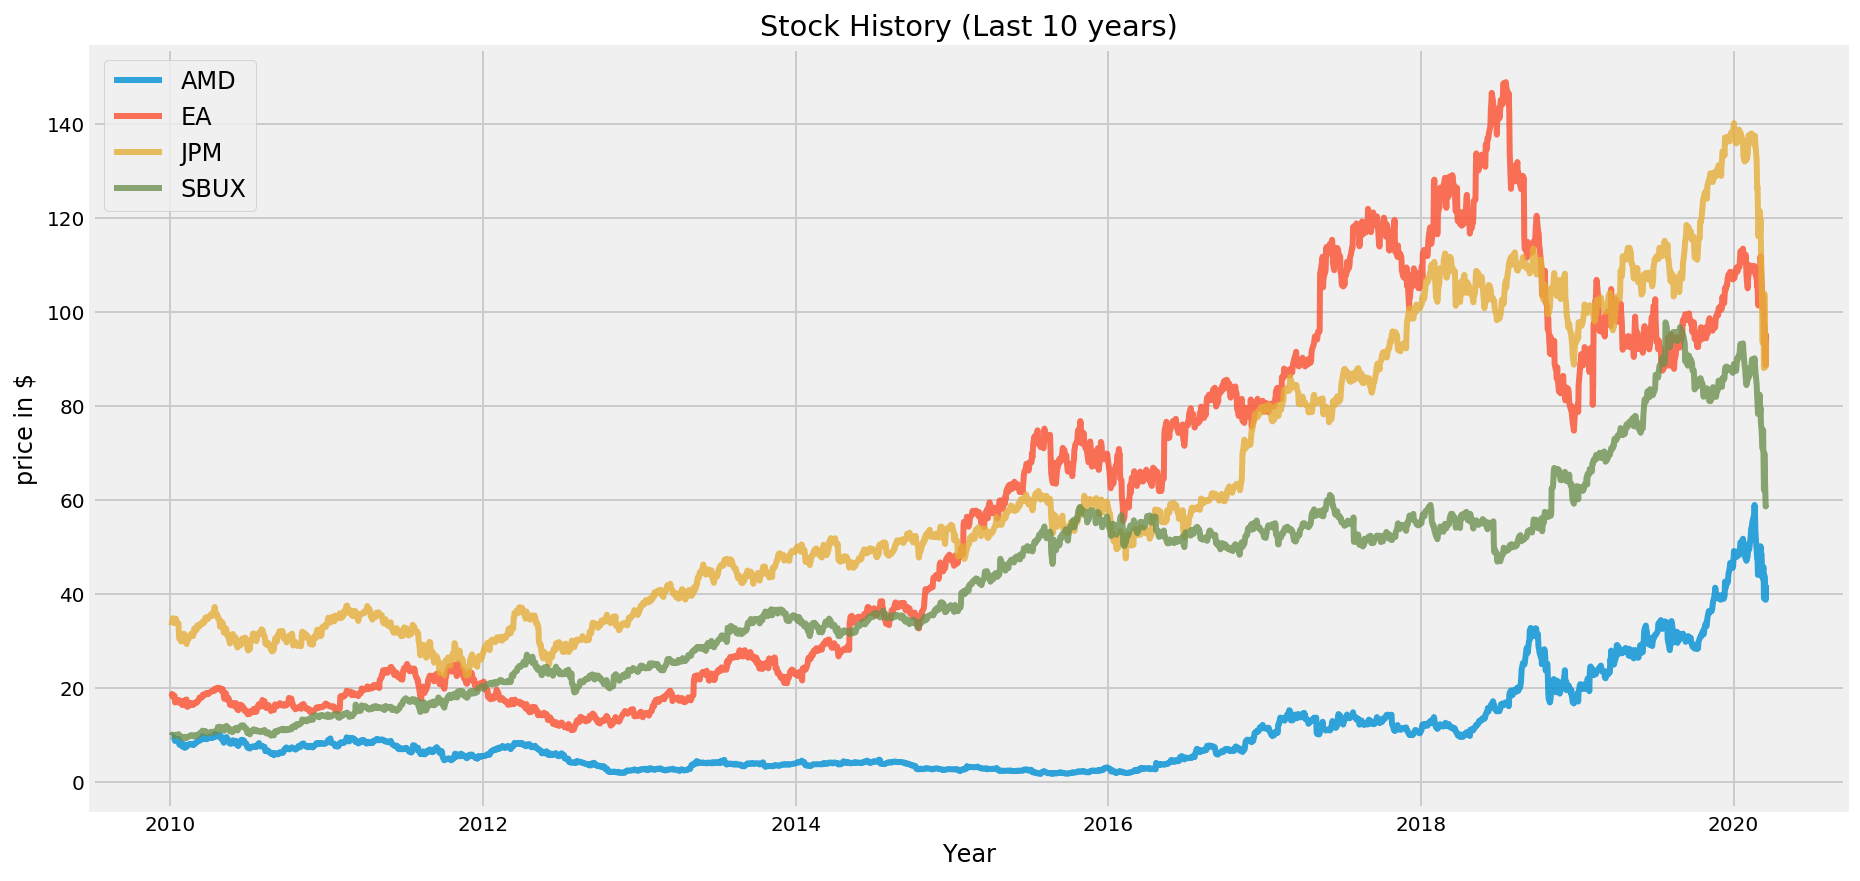

In [10]:
#10 years

plt.figure(figsize=(14, 7))
for c in table2.columns.values:
    plt.plot(table2.index, table2[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper left', fontsize=12)
plt.ylabel('price in $')
plt.xlabel('Year')
plt.title('Stock History (Last 10 years)')

Text(0.5, 1.0, 'Stock History (Last 5 years)')

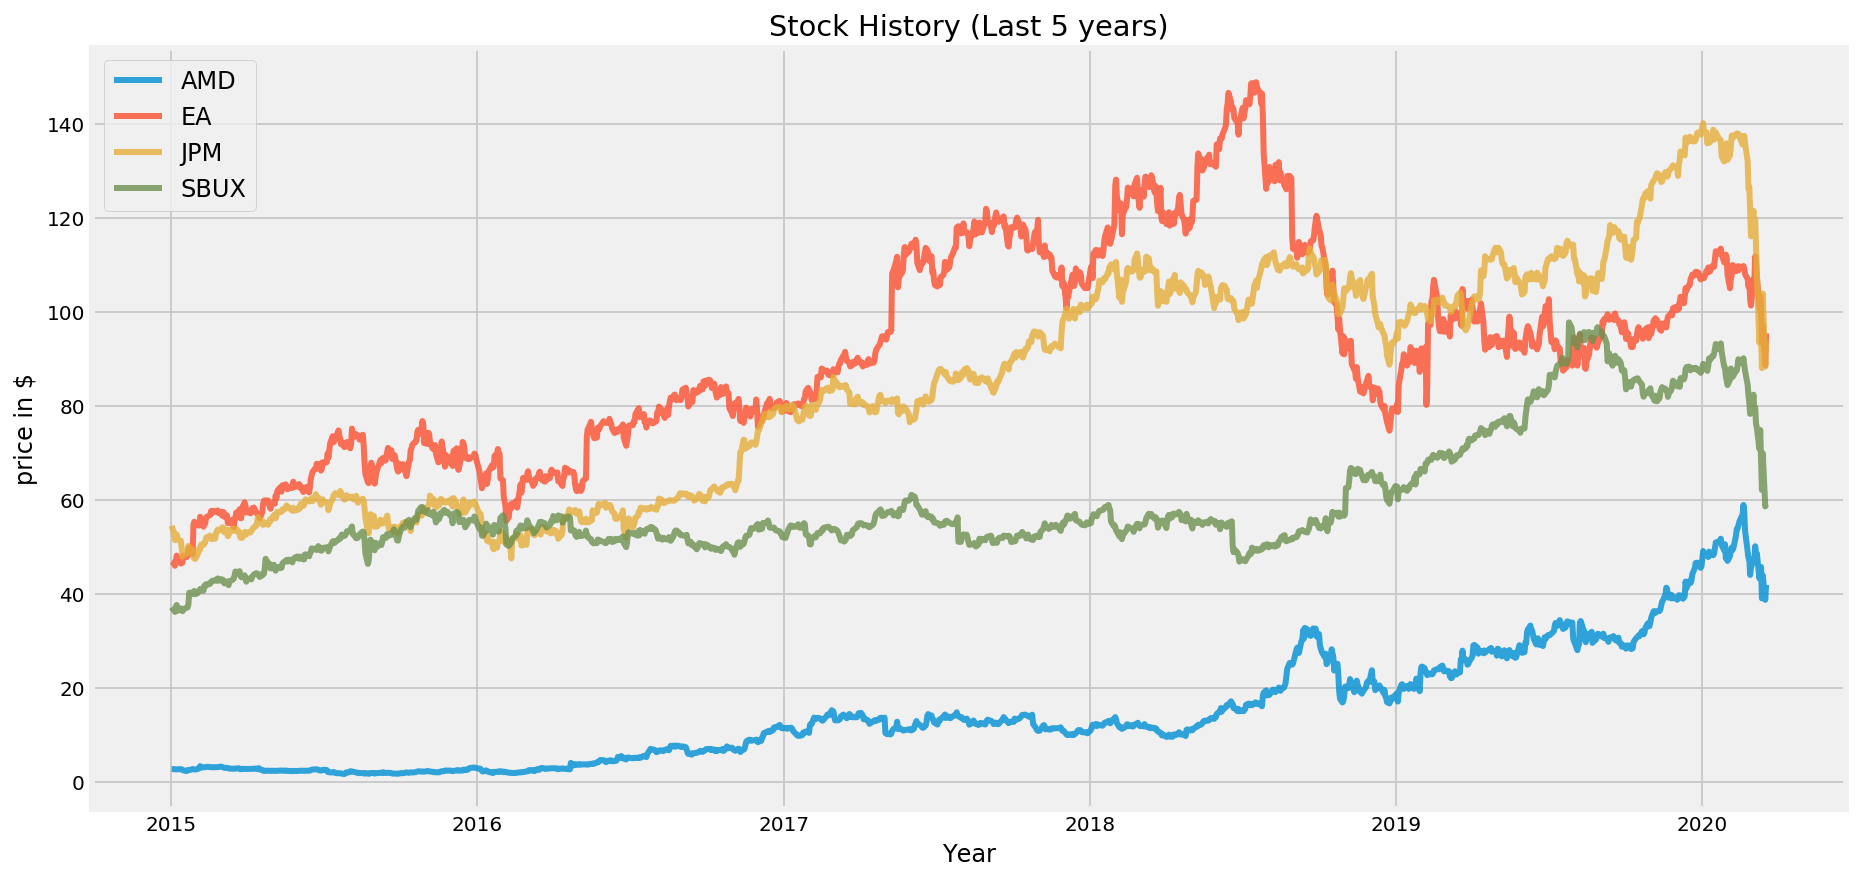

In [11]:
# 5 years

plt.figure(figsize=(14, 7))
for c in table3.columns.values:
    plt.plot(table3.index, table3[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper left', fontsize=12)
plt.ylabel('price in $')
plt.xlabel('Year')
plt.title('Stock History (Last 5 years)')

Text(0.5, 1.0, 'Stock History (Last 15 years)')

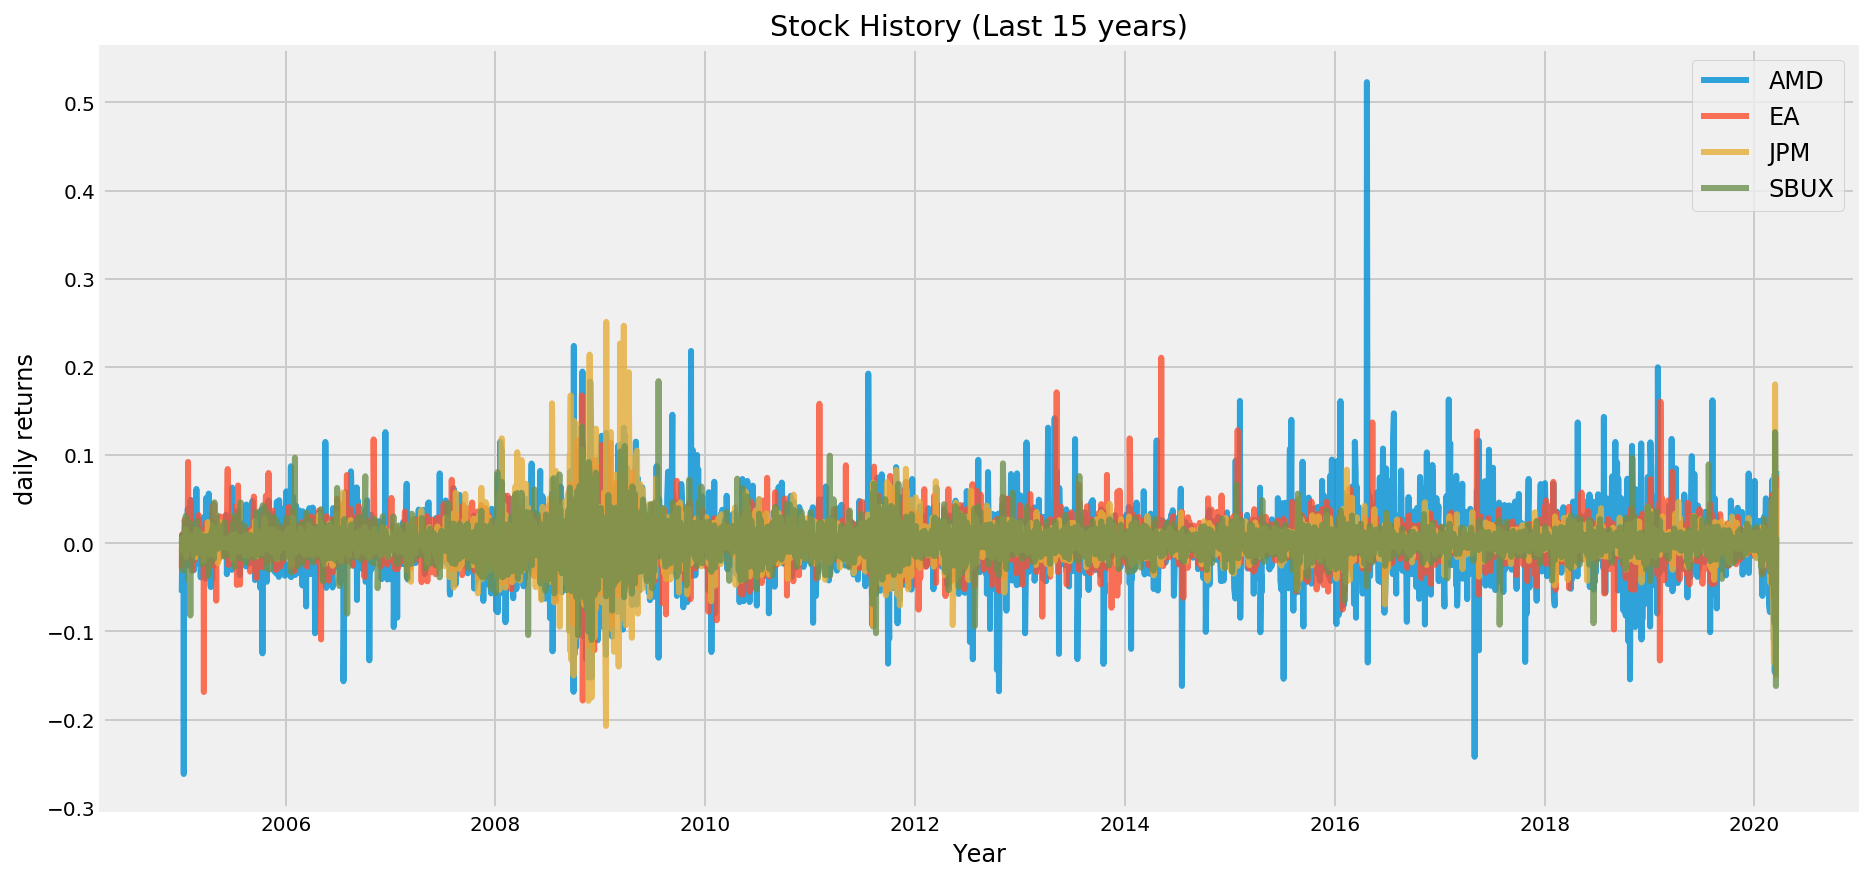

In [12]:
# 15 years
returns1 = table1.pct_change()
plt.figure(figsize=(14, 7))
for c in returns1.columns.values:
    plt.plot(returns1.index, returns1[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper right', fontsize=12)
plt.ylabel('daily returns')
plt.xlabel('Year')
plt.title('Stock History (Last 15 years)')

Text(0.5, 1.0, 'Stock History (Last 10 years)')

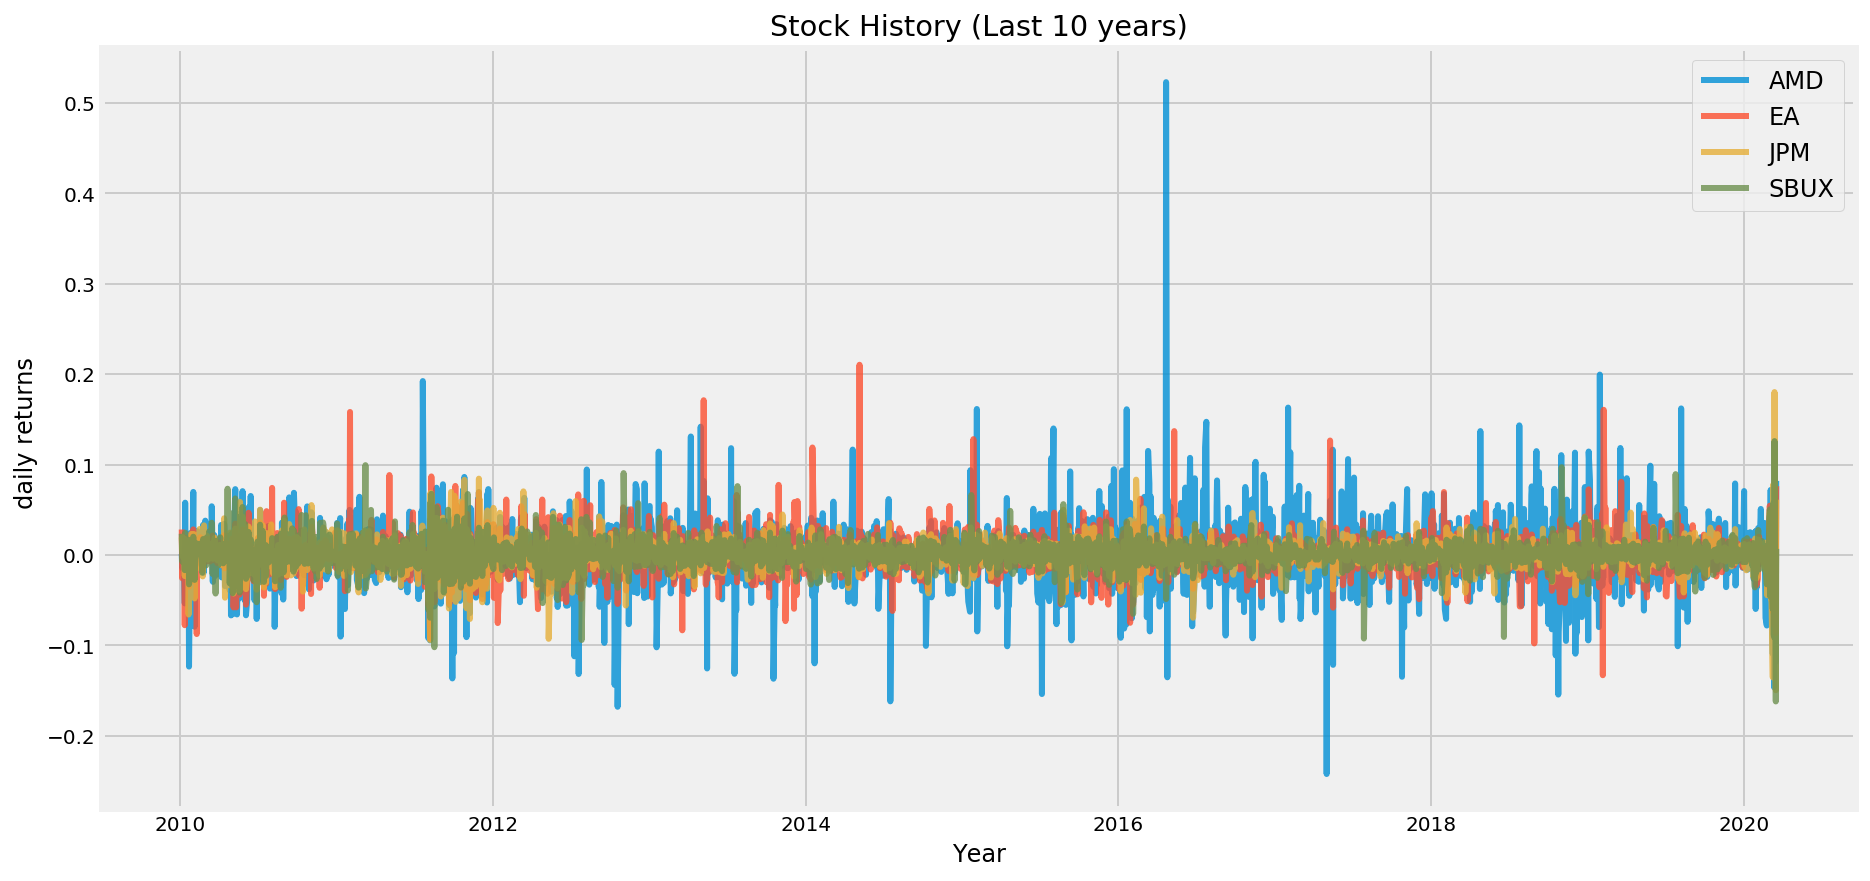

In [13]:
# 10 years
returns2 = table2.pct_change()
plt.figure(figsize=(14, 7))
for c in returns2.columns.values:
    plt.plot(returns2.index, returns2[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper right', fontsize=12)
plt.ylabel('daily returns ')
plt.xlabel('Year')
plt.title('Stock History (Last 10 years)')

Text(0.5, 1.0, 'Stock History (Last 5 years)')

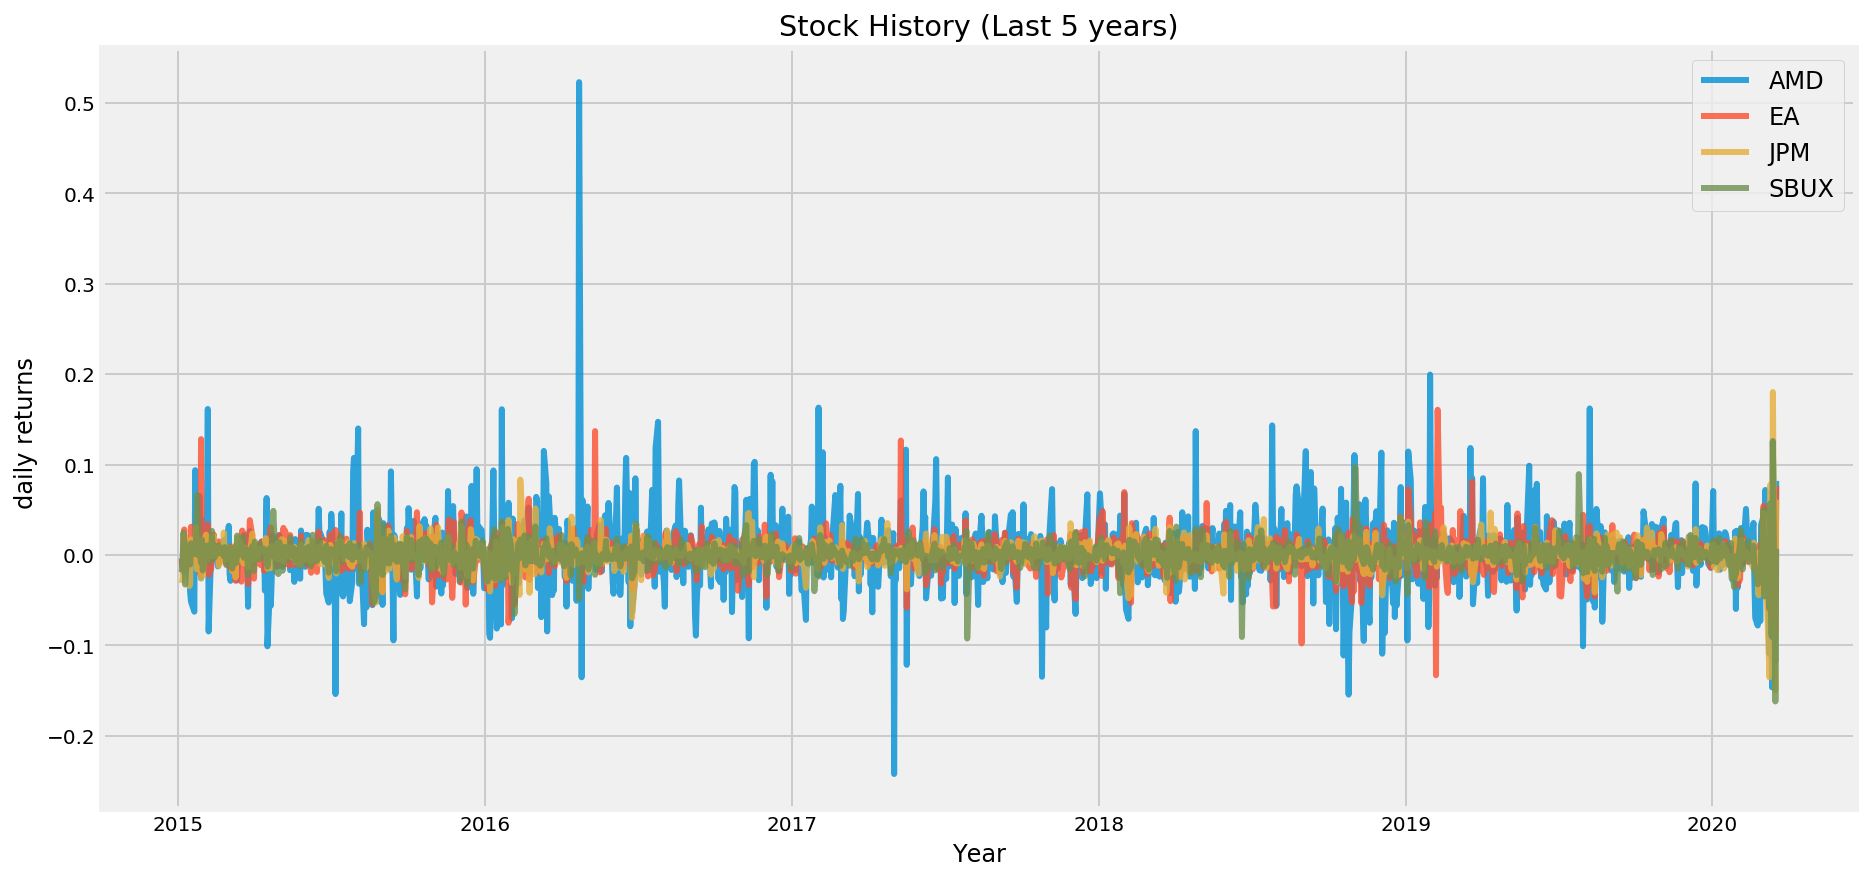

In [14]:
# 5 years
returns3 = table3.pct_change()
plt.figure(figsize=(14, 7))
for c in returns3.columns.values:
    plt.plot(returns3.index, returns3[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper right', fontsize=12)
plt.ylabel('daily returns ')
plt.xlabel('Year')
plt.title('Stock History (Last 5 years)')

In [15]:
#Random Portfolio Generation

def portfolio_annualised_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns*weights ) *252
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    return std, returns
  
def random_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate):
    results = np.zeros((3,num_portfolios))
    weights_record = []
    for i in range(num_portfolios):
        weights = np.random.random(4)
        weights /= np.sum(weights)
        weights_record.append(weights)
        portfolio_std_dev, portfolio_return = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
        results[0,i] = portfolio_std_dev
        results[1,i] = portfolio_return
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_std_dev
    return results, weights_record

In [16]:
def portfolio_annualised_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns*weights ) *252
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    return std, returns
  
def random_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate):
    results = np.zeros((3,num_portfolios))
    weights_record = []
    for i in range(num_portfolios):
        weights = np.random.random(4)
        weights /= np.sum(weights)
        weights_record.append(weights)
        portfolio_std_dev, portfolio_return = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
        results[0,i] = portfolio_std_dev
        results[1,i] = portfolio_return
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_std_dev
    return results, weights_record

In [17]:
#Sharpe Ratio 15 years

returns1 = table1.pct_change()
mean_returns1 = returns1.mean()
cov_matrix1 = returns1.cov()
num_portfolios1 = 25000
risk_free_rate = 0.0075

In [18]:
#Sharpe Ratio 10 years

returns2 = table2.pct_change()
mean_returns2 = returns2.mean()
cov_matrix2 = returns2.cov()
num_portfolios2 = 25000
risk_free_rate = 0.0075

In [19]:
#Sharpe Ratio 5 years

returns3 = table3.pct_change()
mean_returns3 = returns3.mean()
cov_matrix3 = returns3.cov()
num_portfolios3 = 25000
risk_free_rate = 0.0075

In [20]:
# 15 years
def display_simulated_ef_with_random1(mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    results, weights = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate)
    
    max_sharpe_idx = np.argmax(results[2])
    sdp, rp = results[0,max_sharpe_idx], results[1,max_sharpe_idx]
    max_sharpe_allocation = pd.DataFrame(weights[max_sharpe_idx],index=table1.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    
    min_vol_idx = np.argmin(results[0])
    sdp_min, rp_min = results[0,min_vol_idx], results[1,min_vol_idx]
    min_vol_allocation = pd.DataFrame(weights[min_vol_idx],index=table1.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    print ("-"*80)
    print ("Maximum Sharpe Ratio Portfolio Allocation (15 Years)\n")
    print ("Annualised Return:", round(rp,2))
    print ("Annualised Volatility:", round(sdp,2))
    print ("\n")
    print (max_sharpe_allocation)
    print ("-"*80)
    print ("Minimum Volatility Portfolio Allocation (15 Years)\n")
    print ("Annualised Return:", round(rp_min,2))
    print ("Annualised Volatility:", round(sdp_min,2))
    print ("\n")
    print (min_vol_allocation)
    
    plt.figure(figsize=(10, 7))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')
    plt.title('Simulated Portfolio Optimization based on Efficient Frontier (2005 to Present)')
    plt.xlabel('annualised volatility')
    plt.ylabel('annualised returns')
    plt.legend(labelspacing=0.8)

In [21]:
# 10 years
def display_simulated_ef_with_random2(mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    results, weights = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate)
    
    max_sharpe_idx = np.argmax(results[2])
    sdp, rp = results[0,max_sharpe_idx], results[1,max_sharpe_idx]
    max_sharpe_allocation = pd.DataFrame(weights[max_sharpe_idx],index=table2.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    
    min_vol_idx = np.argmin(results[0])
    sdp_min, rp_min = results[0,min_vol_idx], results[1,min_vol_idx]
    min_vol_allocation = pd.DataFrame(weights[min_vol_idx],index=table2.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    print ("-"*80)
    print ("Maximum Sharpe Ratio Portfolio Allocation (10 Years)\n")
    print ("Annualised Return:", round(rp,2))
    print ("Annualised Volatility:", round(sdp,2))
    print ("\n")
    print (max_sharpe_allocation)
    print ("-"*80)
    print ("Minimum Volatility Portfolio Allocation (10 Years)\n")
    print ("Annualised Return:", round(rp_min,2))
    print ("Annualised Volatility:", round(sdp_min,2))
    print ("\n")
    print (min_vol_allocation)
    
    plt.figure(figsize=(10, 7))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')
    plt.title('Simulated Portfolio Optimization based on Efficient Frontier (2010 to Present)')
    plt.xlabel('annualised volatility')
    plt.ylabel('annualised returns')
    plt.legend(labelspacing=0.8)

In [22]:
# 5 years 
def display_simulated_ef_with_random3(mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    results, weights = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate)
    
    max_sharpe_idx = np.argmax(results[2])
    sdp, rp = results[0,max_sharpe_idx], results[1,max_sharpe_idx]
    max_sharpe_allocation = pd.DataFrame(weights[max_sharpe_idx],index=table3.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    
    min_vol_idx = np.argmin(results[0])
    sdp_min, rp_min = results[0,min_vol_idx], results[1,min_vol_idx]
    min_vol_allocation = pd.DataFrame(weights[min_vol_idx],index=table3.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    print ("-"*80)
    print ("Maximum Sharpe Ratio Portfolio Allocation (5 Years)\n")
    print ("Annualised Return:", round(rp,2))
    print ("Annualised Volatility:", round(sdp,2))
    print ("\n")
    print (max_sharpe_allocation)
    print ("-"*80)
    print ("Minimum Volatility Portfolio Allocation (5 Years)\n")
    print ("Annualised Return:", round(rp_min,2))
    print ("Annualised Volatility:", round(sdp_min,2))
    print ("\n")
    print (min_vol_allocation)
    
    plt.figure(figsize=(10, 7))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')
    plt.title('Simulated Portfolio Optimization based on Efficient Frontier (2015 to Present)')
    plt.xlabel('annualised volatility')
    plt.ylabel('annualised returns')
    plt.legend(labelspacing=0.8)

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation (15 Years)

Annualised Return: 0.16
Annualised Volatility: 0.3


Symbols      AMD    EA    JPM   SBUX
allocation  19.7  0.71  24.84  54.75
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation (15 Years)

Annualised Return: 0.14
Annualised Volatility: 0.27


Symbols      AMD     EA   JPM   SBUX
allocation  3.21  25.72  17.6  53.47
--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation (10 Years)

Annualised Return: 0.22
Annualised Volatility: 0.23


Symbols      AMD     EA   JPM   SBUX
allocation  9.79  24.43  1.25  64.52
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation (10 Years)

Annualised Return: 0.19
Annualised Volatility: 0.22


Symbols      AMD     EA    

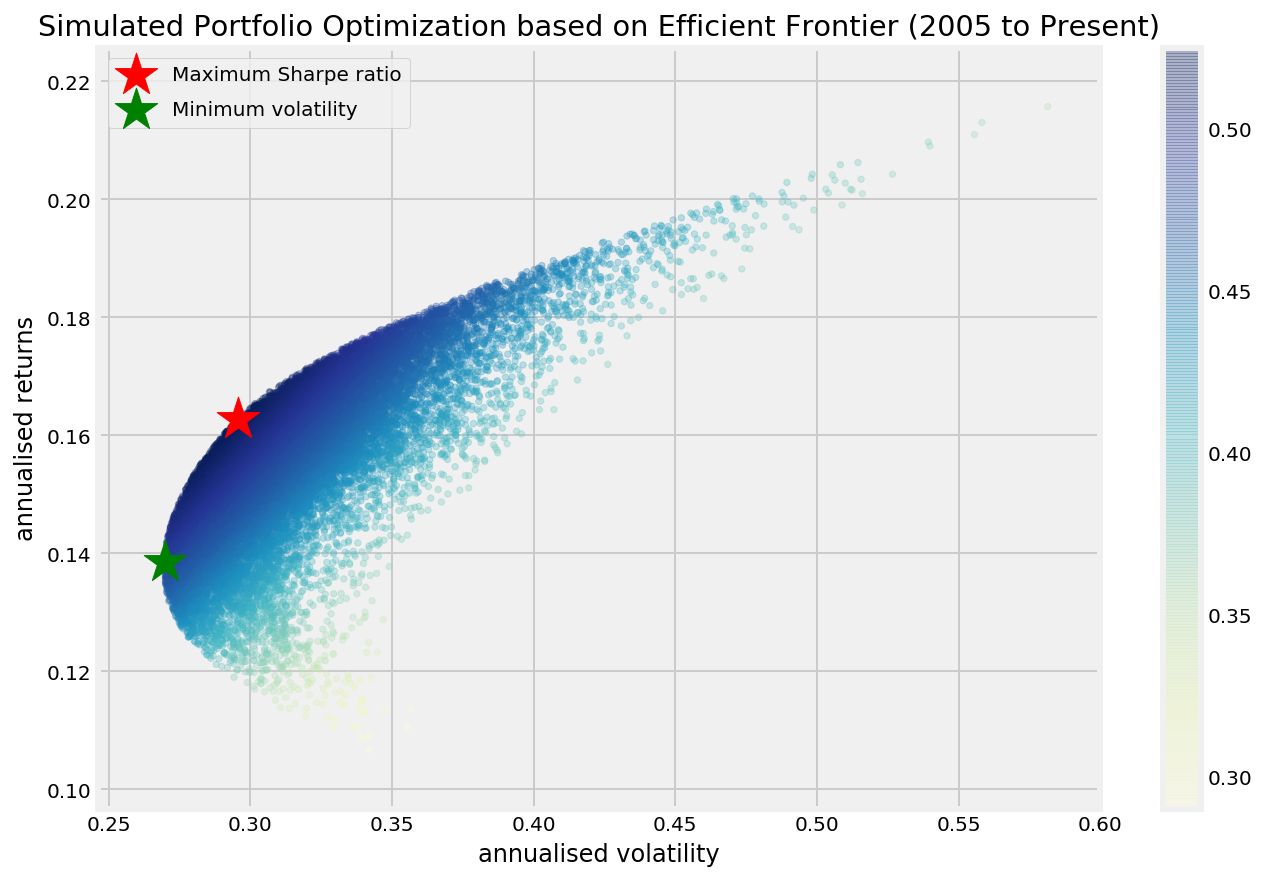

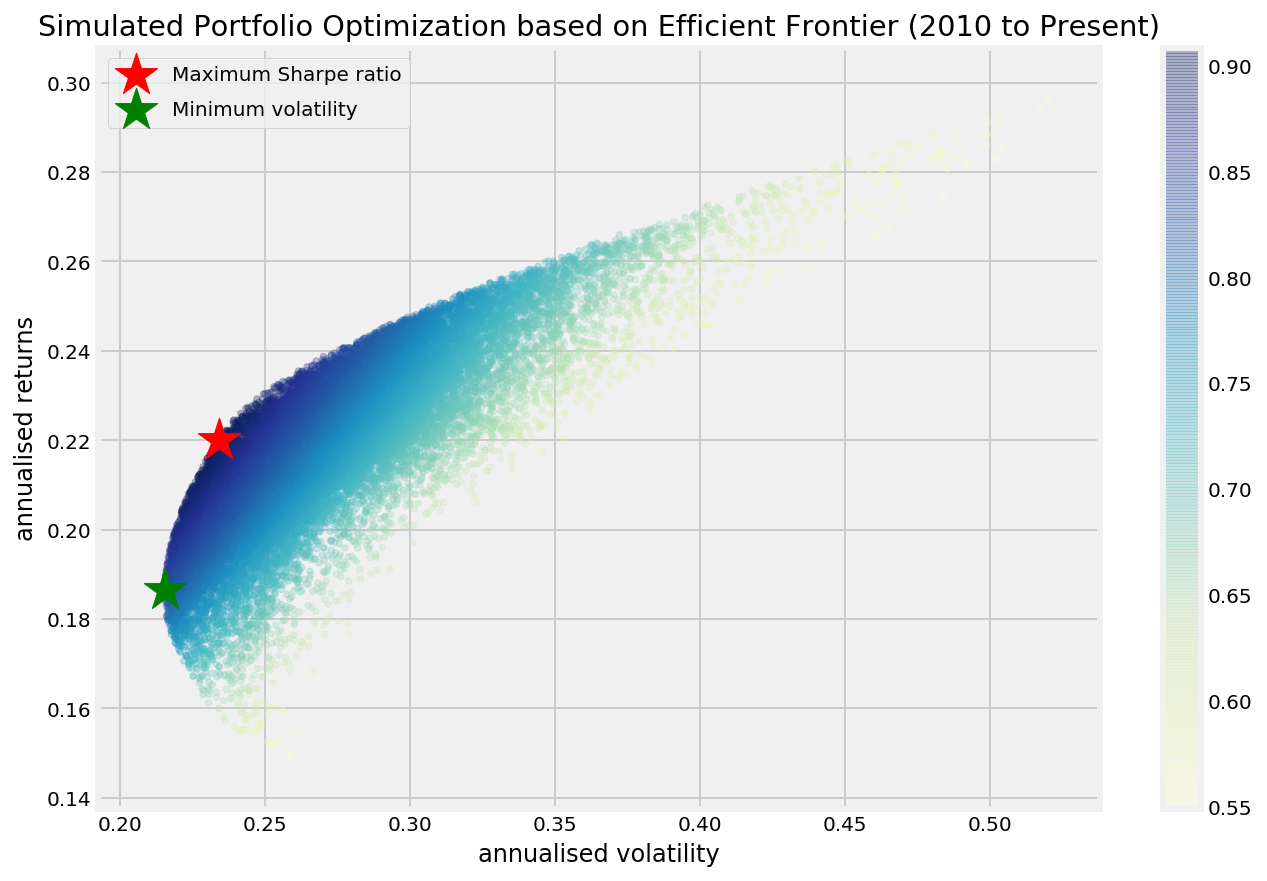

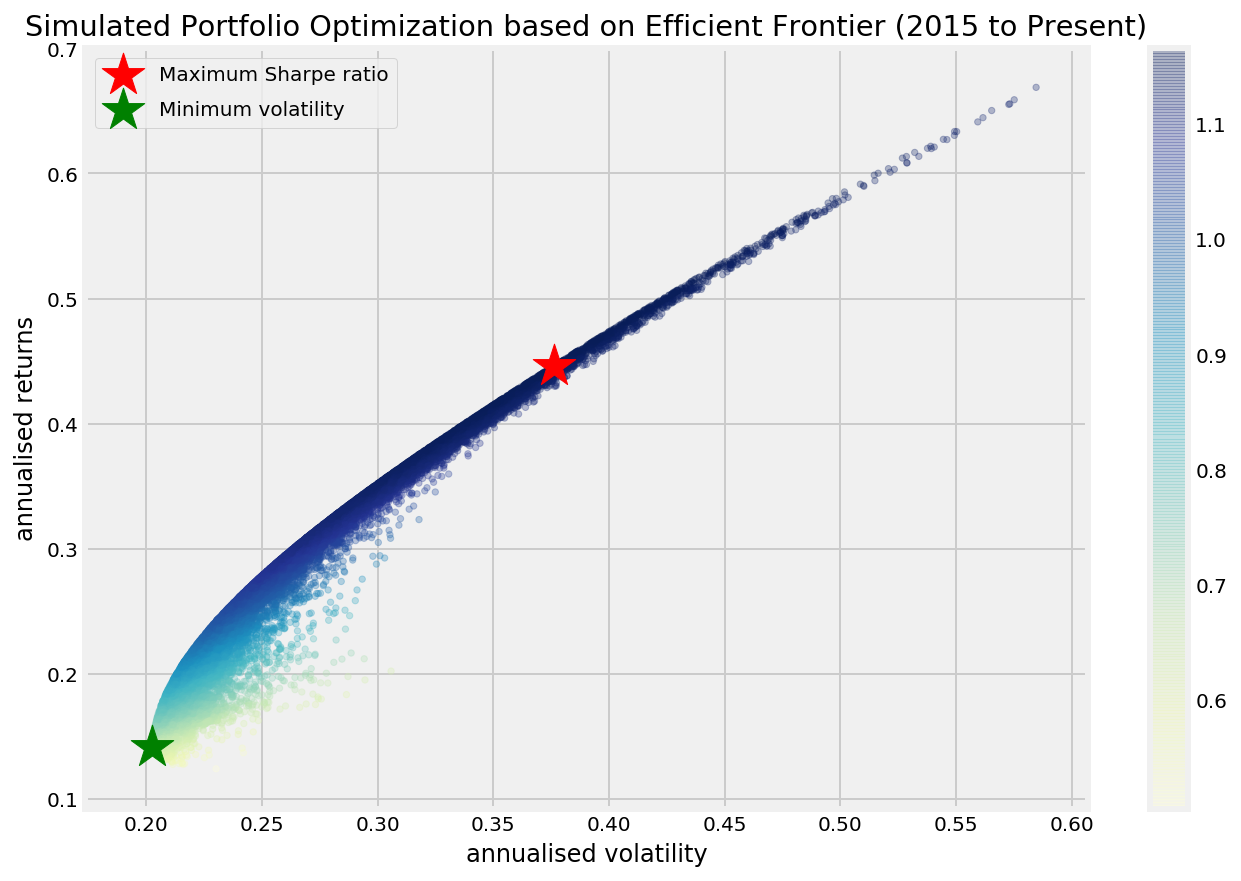

In [23]:
display_simulated_ef_with_random1(mean_returns1, cov_matrix1, num_portfolios1, risk_free_rate)
display_simulated_ef_with_random2(mean_returns2, cov_matrix2, num_portfolios2, risk_free_rate)
display_simulated_ef_with_random3(mean_returns3, cov_matrix3, num_portfolios3, risk_free_rate)

In [24]:
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x)-1})

In [25]:
def neg_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
    p_var, p_ret = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
    return -(p_ret - risk_free_rate) / p_var

def max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix, risk_free_rate)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))
    result = sco.minimize(neg_sharpe_ratio, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)
    return result

In [26]:
def portfolio_volatility(weights, mean_returns, cov_matrix):
    return portfolio_annualised_performance(weights, mean_returns, cov_matrix)[0]

def min_variance(mean_returns, cov_matrix):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))

    result = sco.minimize(portfolio_volatility, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)

    return result

In [27]:
def efficient_return(mean_returns, cov_matrix, target):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)

    def portfolio_return(weights):
        return portfolio_annualised_performance(weights, mean_returns, cov_matrix)[1]

    constraints = ({'type': 'eq', 'fun': lambda x: portfolio_return(x) - target},
                   {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((0,1) for asset in range(num_assets))
    result = sco.minimize(portfolio_volatility, num_assets*[1./num_assets,], args=args, method='SLSQP', bounds=bounds, constraints=constraints)
    return result


def efficient_frontier(mean_returns, cov_matrix, returns_range):
    efficients = []
    for ret in returns_range:
        efficients.append(efficient_return(mean_returns, cov_matrix, ret))
    return efficients

In [28]:
# 15 years

def display_calculated_ef_with_random1(mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    results, _ = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate)
    
    max_sharpe = max_sharpe_ratio(mean_returns1, cov_matrix1, risk_free_rate)
    sdp, rp = portfolio_annualised_performance(max_sharpe['x'], mean_returns, cov_matrix)
    max_sharpe_allocation = pd.DataFrame(max_sharpe.x,index=table1.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T

    min_vol = min_variance(mean_returns1, cov_matrix1)
    sdp_min, rp_min = portfolio_annualised_performance(min_vol['x'], mean_returns, cov_matrix)
    min_vol_allocation = pd.DataFrame(min_vol.x,index=table1.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    print ("-"*80)
    print ("Maximum Sharpe Ratio Portfolio Allocation (15 years)\n")
    print ("Annualised Return:", round(rp,2))
    print ("Annualised Volatility:", round(sdp,2))
    print ("\n")
    print (max_sharpe_allocation)
    print ("-"*80)
    print ("Minimum Volatility Portfolio Allocation (15 years)\n")
    print ("Annualised Return:", round(rp_min,2))
    print ("Annualised Volatility:", round(sdp_min,2))
    print ("\n")
    print (min_vol_allocation)
    
    plt.figure(figsize=(10, 7))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')

    target = np.linspace(rp_min, 0.32, 50)
    efficient_portfolios = efficient_frontier(mean_returns1, cov_matrix1, target)
    plt.plot([p['fun'] for p in efficient_portfolios], target, linestyle='-.', color='black', label='efficient frontier')
    plt.title('Calculated Portfolio Optimization based on Efficient Frontier (2005 to Present)')
    plt.xlabel('annualised volatility')
    plt.ylabel('annualised returns')
    plt.legend(labelspacing=0.8)

In [29]:
# 10 years

def display_calculated_ef_with_random2(mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    results, _ = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate)
    
    max_sharpe = max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate)
    sdp, rp = portfolio_annualised_performance(max_sharpe['x'], mean_returns, cov_matrix)
    max_sharpe_allocation = pd.DataFrame(max_sharpe.x,index=table2.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T

    min_vol = min_variance(mean_returns, cov_matrix)
    sdp_min, rp_min = portfolio_annualised_performance(min_vol['x'], mean_returns, cov_matrix)
    min_vol_allocation = pd.DataFrame(min_vol.x,index=table2.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    print ("-"*80)
    print ("Maximum Sharpe Ratio Portfolio Allocation (10 years)\n")
    print ("Annualised Return:", round(rp,2))
    print ("Annualised Volatility:", round(sdp,2))
    print ("\n")
    print (max_sharpe_allocation)
    print ("-"*80)
    print ("Minimum Volatility Portfolio Allocation (10 years)\n")
    print ("Annualised Return:", round(rp_min,2))
    print ("Annualised Volatility:", round(sdp_min,2))
    print ("\n")
    print (min_vol_allocation)
    
    plt.figure(figsize=(10, 7))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')

    target = np.linspace(rp_min, 0.32, 50)
    efficient_portfolios = efficient_frontier(mean_returns, cov_matrix, target)
    plt.plot([p['fun'] for p in efficient_portfolios], target, linestyle='-.', color='black', label='efficient frontier')
    plt.title('Calculated Portfolio Optimization based on Efficient Frontier (2010 to Present)')
    plt.xlabel('annualised volatility')
    plt.ylabel('annualised returns')
    plt.legend(labelspacing=0.8)

In [30]:
# 5 years

def display_calculated_ef_with_random3(mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    results, _ = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate)
    
    max_sharpe = max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate)
    sdp, rp = portfolio_annualised_performance(max_sharpe['x'], mean_returns, cov_matrix)
    max_sharpe_allocation = pd.DataFrame(max_sharpe.x,index=table3.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T

    min_vol = min_variance(mean_returns, cov_matrix)
    sdp_min, rp_min = portfolio_annualised_performance(min_vol['x'], mean_returns, cov_matrix)
    min_vol_allocation = pd.DataFrame(min_vol.x,index=table3.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    print ("-"*80)
    print ("Maximum Sharpe Ratio Portfolio Allocation (5 years)\n")
    print ("Annualised Return:", round(rp,2))
    print ("Annualised Volatility:", round(sdp,2))
    print ("\n")
    print (max_sharpe_allocation)
    print ("-"*80)
    print ("Minimum Volatility Portfolio Allocation (5 years)\n")
    print ("Annualised Return:", round(rp_min,2))
    print ("Annualised Volatility:", round(sdp_min,2))
    print ("\n")
    print (min_vol_allocation)
    
    plt.figure(figsize=(10, 7))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')

    target = np.linspace(rp_min, 0.32, 50)
    efficient_portfolios = efficient_frontier(mean_returns, cov_matrix, target)
    plt.plot([p['fun'] for p in efficient_portfolios], target, linestyle='-.', color='black', label='efficient frontier')
    plt.title('Calculated Portfolio Optimization based on Efficient Frontier (2015 to Present)')
    plt.xlabel('annualised volatility')
    plt.ylabel('annualised returns')
    plt.legend(labelspacing=0.8)

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation (15 years)

Annualised Return: 0.16
Annualised Volatility: 0.29


Symbols       AMD   EA    JPM   SBUX
allocation  18.76  1.0  24.57  55.67
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation (15 years)

Annualised Return: 0.14
Annualised Volatility: 0.27


Symbols      AMD     EA    JPM   SBUX
allocation  2.98  27.41  17.32  52.29
--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation (10 years)

Annualised Return: 0.22
Annualised Volatility: 0.24


Symbols       AMD     EA  JPM   SBUX
allocation  10.89  25.75  0.0  63.36
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation (10 years)

Annualised Return: 0.19
Annualised Volatility: 0.22


Symbols     AMD    EA   

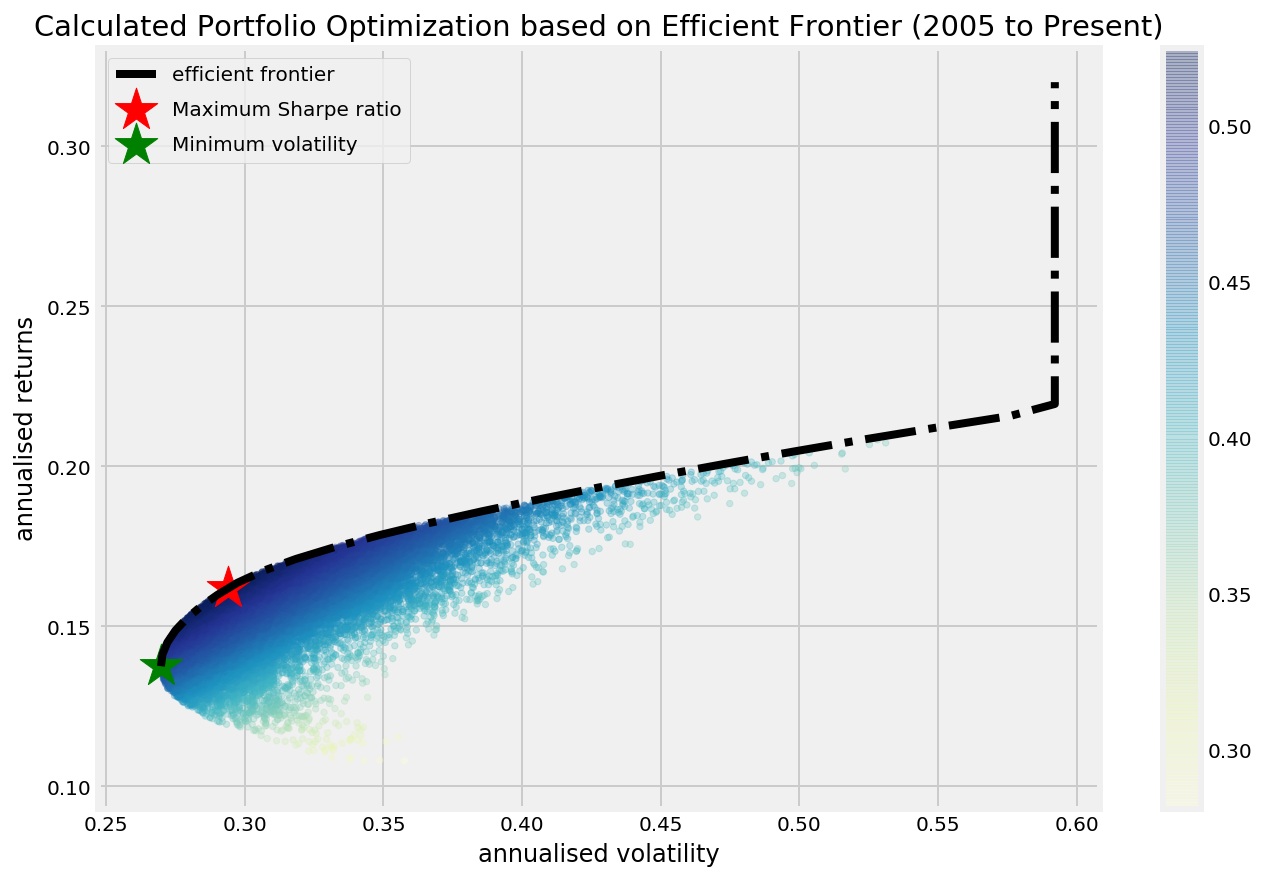

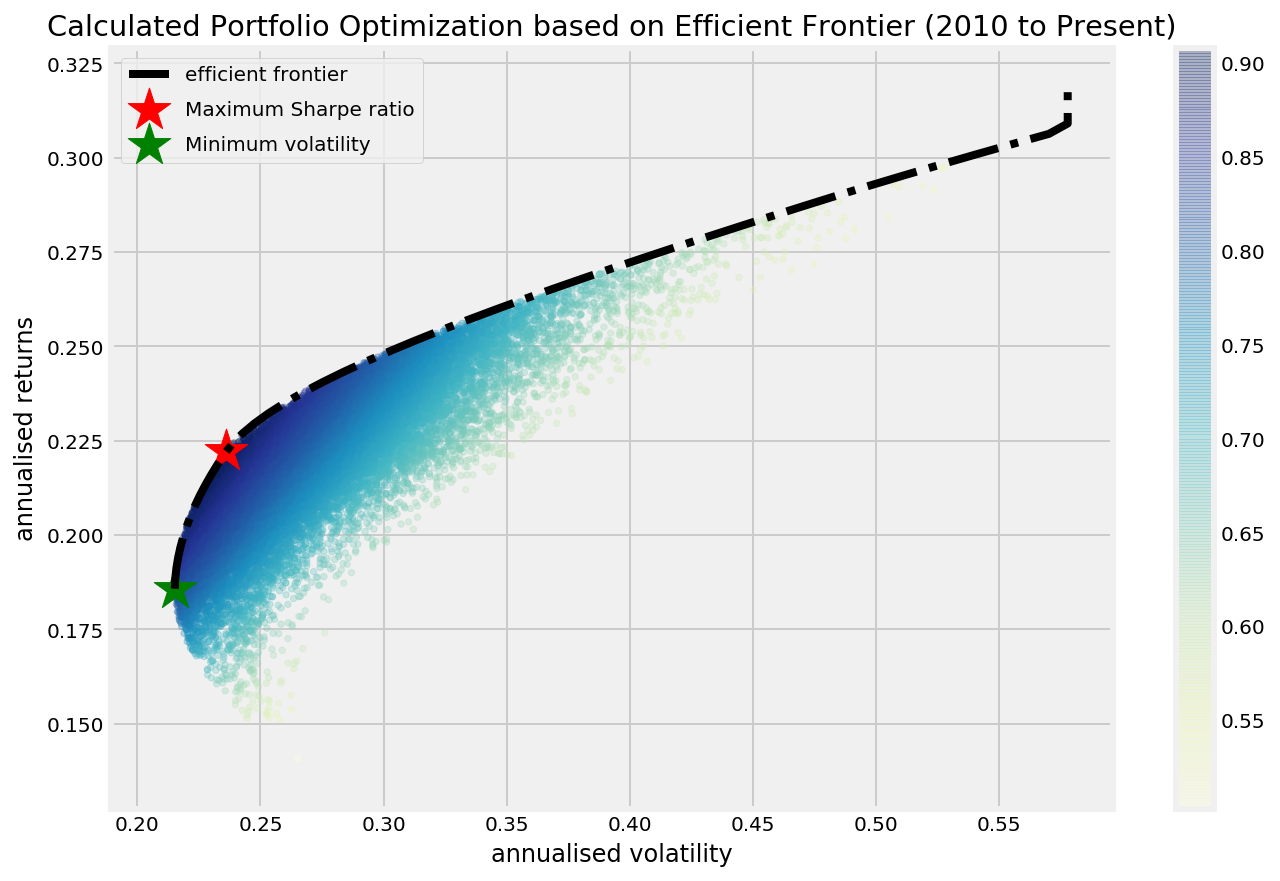

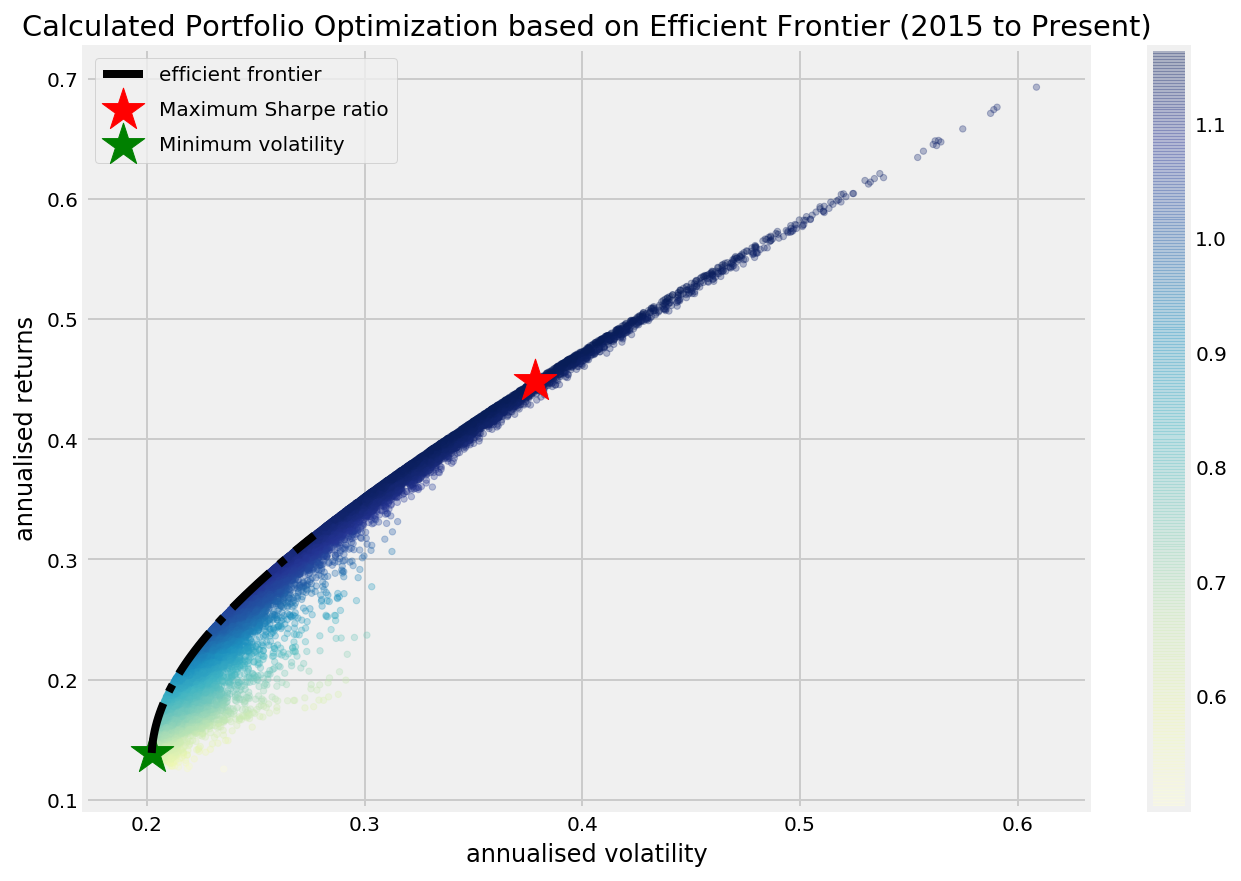

In [31]:
display_calculated_ef_with_random1(mean_returns1, cov_matrix1, num_portfolios1, risk_free_rate)
display_calculated_ef_with_random2(mean_returns2, cov_matrix2, num_portfolios2, risk_free_rate)
display_calculated_ef_with_random3(mean_returns3, cov_matrix3, num_portfolios3, risk_free_rate)

In [32]:
#9
def display_ef_with_selected1(mean_returns, cov_matrix, risk_free_rate):
    max_sharpe = max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate)
    sdp, rp = portfolio_annualised_performance(max_sharpe['x'], mean_returns, cov_matrix)
    max_sharpe_allocation = pd.DataFrame(max_sharpe.x,index=table1.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T

    min_vol = min_variance(mean_returns, cov_matrix)
    sdp_min, rp_min = portfolio_annualised_performance(min_vol['x'], mean_returns, cov_matrix)
    min_vol_allocation = pd.DataFrame(min_vol.x,index=table1.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    an_vol = np.std(returns1) * np.sqrt(252)
    an_rt = mean_returns * 252
    
    print ("-"*80)
    print ("Maximum Sharpe Ratio Portfolio Allocation, (15 years)\n")
    print ("Annualised Return:", round(rp,2))
    print ("Annualised Volatility:", round(sdp,2))
    print ("\n")
    print (max_sharpe_allocation)
    print ("-"*80)
    print ("Minimum Volatility Portfolio Allocation (15 Years)\n")
    print ("Annualised Return:", round(rp_min,2))
    print ("Annualised Volatility:", round(sdp_min,2))
    print ("\n")
    print (min_vol_allocation)
    print ("-"*80)
    print ("Individual Stock Returns and Volatility (15 Years)\n")
    for i, txt in enumerate(table1.columns):
        print (txt,":","annualised return",round(an_rt[i],2),", annualised volatility:",round(an_vol[i],2))
    print ("-"*80)
    
    fig, ax = plt.subplots(figsize=(10, 7))
    ax.scatter(an_vol,an_rt,marker='o',s=200)

    for i, txt in enumerate(table1.columns):
        ax.annotate(txt, (an_vol[i],an_rt[i]), xytext=(10,0), textcoords='offset points')
    ax.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    ax.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')

    target = np.linspace(rp_min, 0.34, 50)
    efficient_portfolios = efficient_frontier(mean_returns, cov_matrix, target)
    ax.plot([p['fun'] for p in efficient_portfolios], target, linestyle='-.', color='black', label='efficient frontier')
    ax.set_title('Portfolio Optimization with Individual Stocks (2005 to Present)')
    ax.set_xlabel('annualised volatility')
    ax.set_ylabel('annualised returns')
    ax.legend(labelspacing=0.8)

In [33]:
#9
def display_ef_with_selected2(mean_returns, cov_matrix, risk_free_rate):
    max_sharpe = max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate)
    sdp, rp = portfolio_annualised_performance(max_sharpe['x'], mean_returns, cov_matrix)
    max_sharpe_allocation = pd.DataFrame(max_sharpe.x,index=table2.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T

    min_vol = min_variance(mean_returns, cov_matrix)
    sdp_min, rp_min = portfolio_annualised_performance(min_vol['x'], mean_returns, cov_matrix)
    min_vol_allocation = pd.DataFrame(min_vol.x,index=table2.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    an_vol = np.std(returns2) * np.sqrt(252)
    an_rt = mean_returns * 252
    
    print ("-"*80)
    print ("Maximum Sharpe Ratio Portfolio Allocation, (10 years) \n")
    print ("Annualised Return:", round(rp,2))
    print ("Annualised Volatility:", round(sdp,2))
    print ("\n")
    print (max_sharpe_allocation)
    print ("-"*80)
    print ("Minimum Volatility Portfolio Allocation (10 Years) \n")
    print ("Annualised Return:", round(rp_min,2))
    print ("Annualised Volatility:", round(sdp_min,2))
    print ("\n")
    print (min_vol_allocation)
    print ("-"*80)
    print ("Individual Stock Returns and Volatility (10 Years)\n")
    for i, txt in enumerate(table2.columns):
        print (txt,":","annualised return",round(an_rt[i],2),", annualised volatility:",round(an_vol[i],2))
    print ("-"*80)
    
    fig, ax = plt.subplots(figsize=(10, 7))
    ax.scatter(an_vol,an_rt,marker='o',s=200)

    for i, txt in enumerate(table2.columns):
        ax.annotate(txt, (an_vol[i],an_rt[i]), xytext=(10,0), textcoords='offset points')
    ax.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    ax.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')

    target = np.linspace(rp_min, 0.34, 50)
    efficient_portfolios = efficient_frontier(mean_returns, cov_matrix, target)
    ax.plot([p['fun'] for p in efficient_portfolios], target, linestyle='-.', color='black', label='efficient frontier')
    ax.set_title('Portfolio Optimization with Individual Stocks (2010 to Present)')
    ax.set_xlabel('annualised volatility')
    ax.set_ylabel('annualised returns')
    ax.legend(labelspacing=0.8)

In [34]:
#9
def display_ef_with_selected3(mean_returns, cov_matrix, risk_free_rate):
    max_sharpe = max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate)
    sdp, rp = portfolio_annualised_performance(max_sharpe['x'], mean_returns, cov_matrix)
    max_sharpe_allocation = pd.DataFrame(max_sharpe.x,index=table3.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T

    min_vol = min_variance(mean_returns, cov_matrix)
    sdp_min, rp_min = portfolio_annualised_performance(min_vol['x'], mean_returns, cov_matrix)
    min_vol_allocation = pd.DataFrame(min_vol.x,index=table3.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    an_vol = np.std(returns3) * np.sqrt(252)
    an_rt = mean_returns * 252
    
    print ("-"*80)
    print ("Maximum Sharpe Ratio Portfolio Allocation,(5 years) \n")
    print ("Annualised Return:", round(rp,2))
    print ("Annualised Volatility:", round(sdp,2))
    print ("\n")
    print (max_sharpe_allocation)
    print ("-"*80)
    print ("Minimum Volatility Portfolio Allocation (5 Years)\n")
    print ("Annualised Return:", round(rp_min,2))
    print ("Annualised Volatility:", round(sdp_min,2))
    print ("\n")
    print (min_vol_allocation)
    print ("-"*80)
    print ("Individual Stock Returns and Volatility (5 Years) \n")
    for i, txt in enumerate(table3.columns):
        print (txt,":","annualised return",round(an_rt[i],2),", annualised volatility:",round(an_vol[i],2))
    print ("-"*80)
    
    fig, ax = plt.subplots(figsize=(10, 7))
    ax.scatter(an_vol,an_rt,marker='o',s=200)

    for i, txt in enumerate(table3.columns):
        ax.annotate(txt, (an_vol[i],an_rt[i]), xytext=(10,0), textcoords='offset points')
    ax.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    ax.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')

    target = np.linspace(rp_min, 0.34, 50)
    efficient_portfolios = efficient_frontier(mean_returns, cov_matrix, target)
    ax.plot([p['fun'] for p in efficient_portfolios], target, linestyle='-.', color='black', label='efficient frontier')
    ax.set_title('Portfolio Optimization with Individual Stocks (2015 to Present)')
    ax.set_xlabel('annualised volatility')
    ax.set_ylabel('annualised returns')
    ax.legend(labelspacing=0.8)

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation, (15 years)

Annualised Return: 0.16
Annualised Volatility: 0.29


Symbols       AMD   EA    JPM   SBUX
allocation  18.76  1.0  24.57  55.67
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation (15 Years)

Annualised Return: 0.14
Annualised Volatility: 0.27


Symbols      AMD     EA    JPM   SBUX
allocation  2.98  27.41  17.32  52.29
--------------------------------------------------------------------------------
Individual Stock Returns and Volatility (15 Years)

AMD : annualised return 0.22 , annualised volatility: 0.59
EA : annualised return 0.1 , annualised volatility: 0.38
JPM : annualised return 0.16 , annualised volatility: 0.38
SBUX : annualised return 0.15 , annualised volatility: 0.31
--------------------------------------------------------------------------------
------------------------

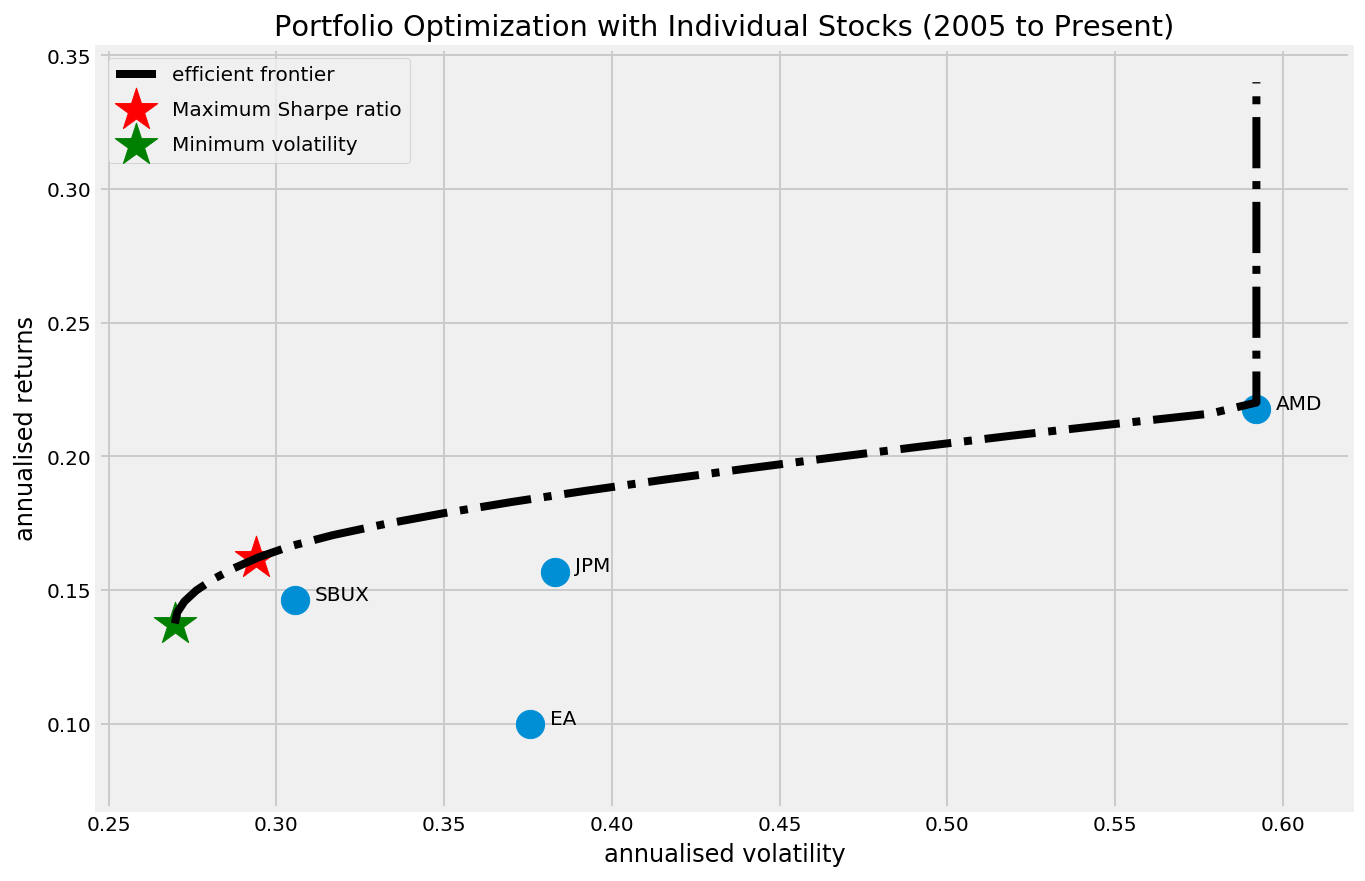

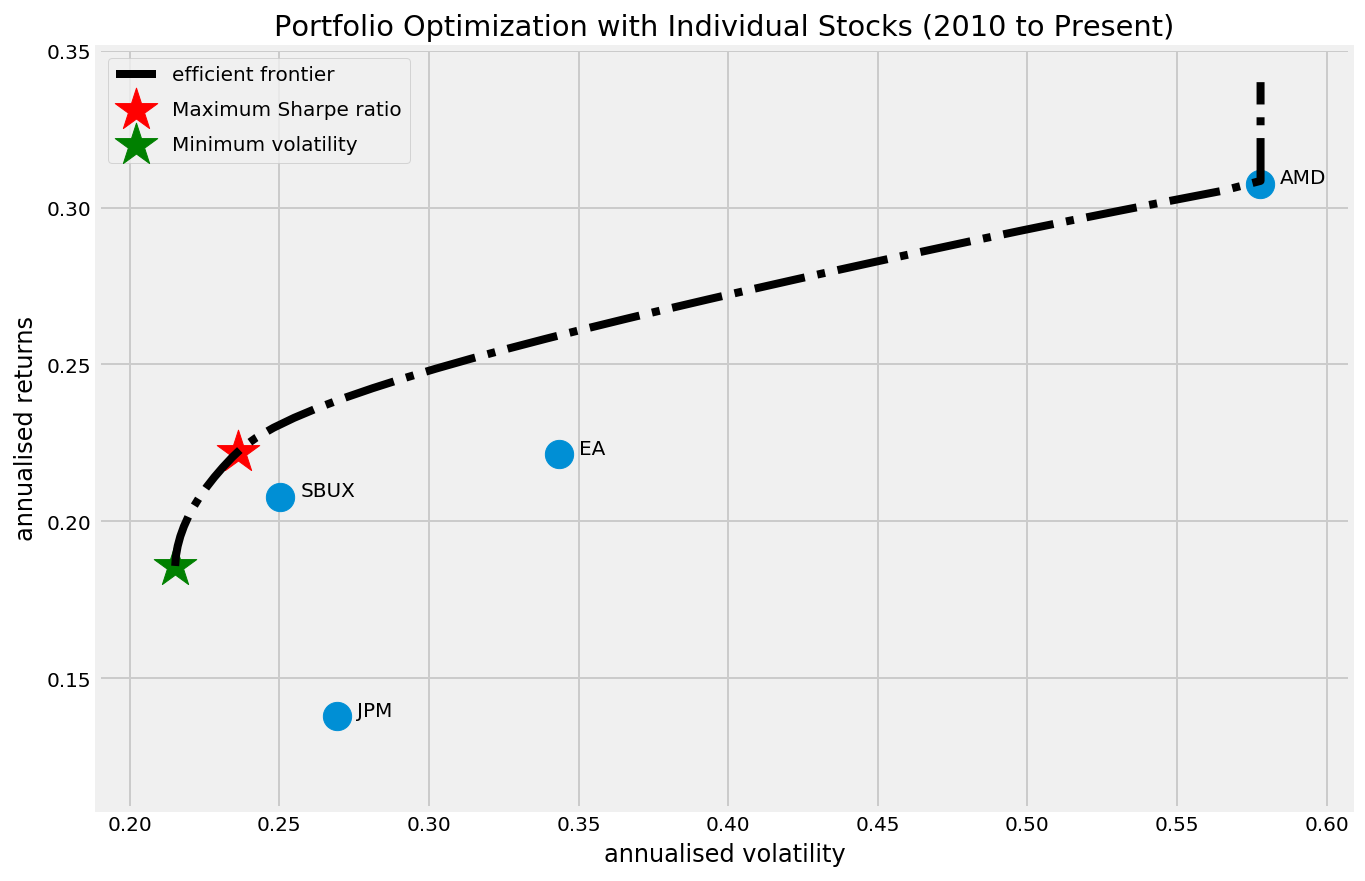

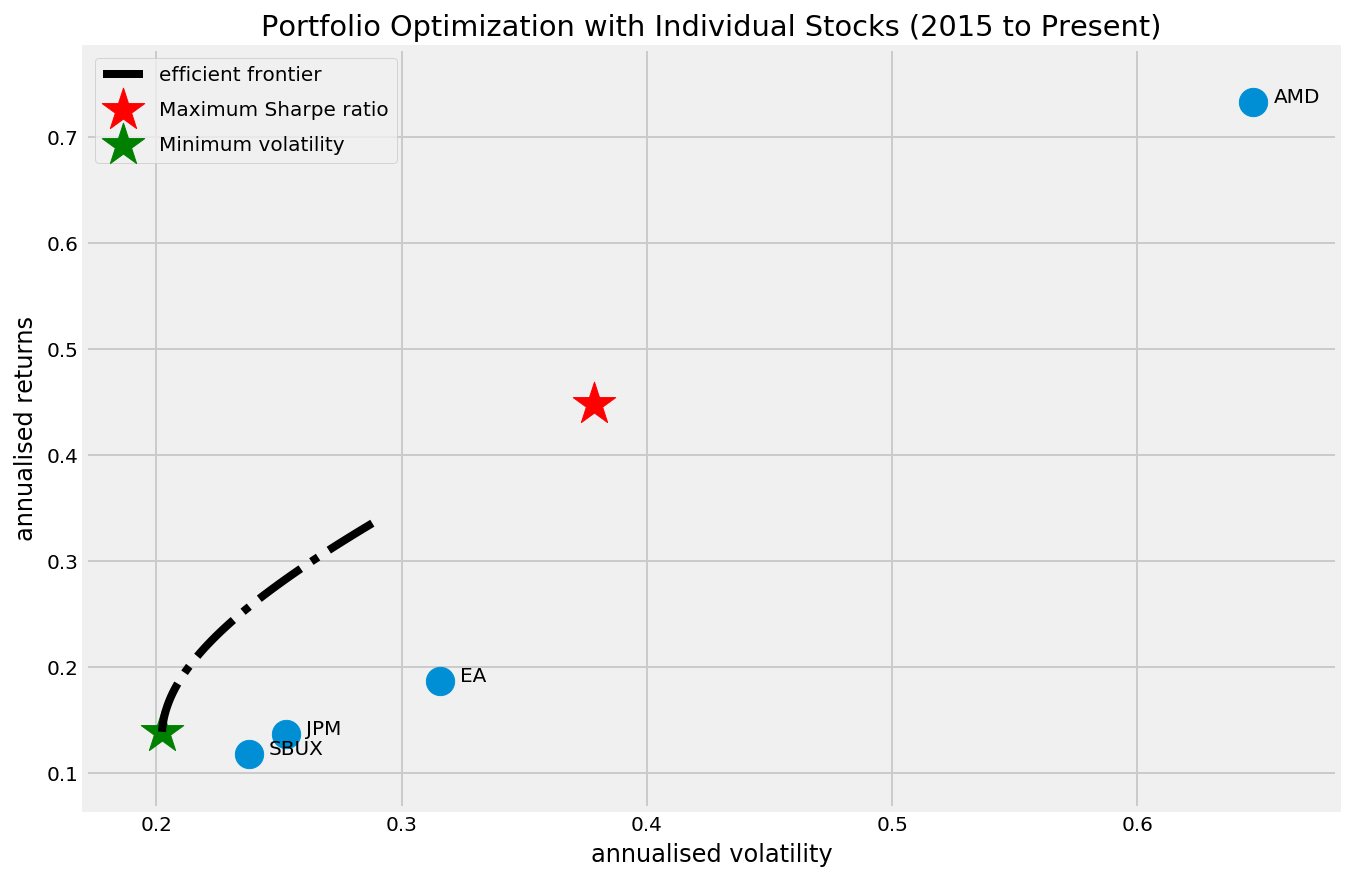

In [35]:
display_ef_with_selected1(mean_returns1, cov_matrix1, risk_free_rate)
display_ef_with_selected2(mean_returns2, cov_matrix2, risk_free_rate)
display_ef_with_selected3(mean_returns3, cov_matrix3, risk_free_rate)

Based on the portfolio constructed, what are some of the differences that you are seeing in your
efficient frontier curves? What are some of the contributing factors behind the difference? (1 page,
single spaced).

* Looking at the curve, and taking into consideration only the points where each 

stock lies on the curve, we see that:

•	For 15 years of historical data - except for AMD, all the other stocks lie below the curve. They cluster to the left, which is perfect for someone with lower risk appetite

•	SBUX is the most preferred stock of the bunch. It has the lowest risk, and although it does not lie on the curve, it comes very close.

•	AMD, on the other hand, is the embodiment of high-risk/high return. Depending on the investor's risk appetite, they might consider AMD to be a great addition to the portfolio.

•	EA is the underperformer. For the risk involved, it does not provide enough return.

•	JPM is also close to the curve, but with a higher risk involved than SBUX.

* Looking at the annualized volatility, the portfolio volatility is 0.29. The annualized portfolio

volatility is less than every one of the individual stock's annualized volatility. This is good, but the portfolio (based on 15 years of history)  might still be classified as sub-optimal.

•	For 10 years of Historical data – 

•	Again AMD is still a high risk, high return contender.

•	EA Performed better with 10 years of Historical data than with 15 years. It still falls below the curve, but it has a higher return for a slightly lower risk than with 15 years of historical data.

•	SBUX also performs better when using only 10 years of Historical data. The return increases and the risk is lower than with 15 years of historical data.

•	JPM performs worse than the rest of the stocks. It also performs better with 15 years of historical data. This means that before 2010 it was doing better than after. The risk is low, but for the same risk, the investor could find another stock that yields a much better return.

•	Again, the cluster is more to the left and center, than to the right of the curve.

*Looking at the annualized volatility, the portfolio volatility is 0.24. The portfolio

volatility is less than every one of the individual volatility.

•	For 5 years, once again, the cluster of the stocks in the portfolio is to the left. 

•	With only 5 years of historical data, the portfolio return is the best compared to using 10 or 15 years. Using 5 years of historical data is the most insightful when trying to make a portfolio at present. It is more reflective of the current situation of the companies. It should be given the most weight (5, 10, and 15 years) when preparing the portfolio. 

•	None of the stocks in the portfolio aside from AMD yields nearly as much return as they should given the risk involved. If the investor has a high-risk appetite, then it is worth considering using the allocation calculated using the maximum Sharpe Ratio. 

•	The annualized portfolio return is 0.45, and the volatility is 0.38. This is because more weight is given to AMD, which is a high risk, high return.

•	Considering how poorly the stocks to the left of the curve perform, I would say that the portfolio is sub-optimal despite the performance of AMD.

Also as the number of years decreases the distance between the maximum sharpe ratio and the minimum volatility increases.